In [54]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import os
import warnings
import datetime

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [57]:
#%matplotlib inline
pd.set_option("display.max_rows", None, "display.max_columns", None)
warnings.simplefilter(action='ignore')
plt.style.use('seaborn')

In [58]:
df_main = pd.read_csv("C:/Users/user/Downloads/dataset.csv")

In [59]:
df_main.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [60]:
df_main.shape

(6019, 14)

In [61]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [63]:
X_train, X_test, y_train, y_test = train_test_split(df_main.iloc[:, :-1], 
                                                    df_main.iloc[:, -1], 
                                                    test_size = 0.3, 
                                                    random_state = 42)

In [64]:
X_train=X_train.iloc[:,1:]
X_test=X_test.iloc[:,1:]

In [65]:
X_train["Name"].value_counts()

Name
Mahindra XUV500 W8 2WD                                         35
Maruti Swift VDI                                               31
Maruti Ritz VDi                                                26
Hyundai i10 Sportz                                             25
Maruti Swift Dzire VDI                                         24
Honda City 1.5 S MT                                            22
Maruti Swift VDI BSIV                                          22
Toyota Fortuner 3.0 Diesel                                     20
Honda Brio S MT                                                19
Hyundai Grand i10 Sportz                                       19
Honda Amaze S i-Dtech                                          18
Maruti Wagon R LXI                                             18
Hyundai EON Era Plus                                           17
Renault KWID RXT                                               17
Maruti Alto 800 LXI                                            17
Marut

In [7]:
df_main.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [66]:
make_train=X_train["Name"].str.split(" ",expand = True)
make_test=X_test["Name"].str.split(" ",expand = True)

In [67]:
X_train["Manufacturer"] = make_train[0]
X_test["Manufacturer"] = make_test[0]

Text(0, 0.5, 'Count of cars')

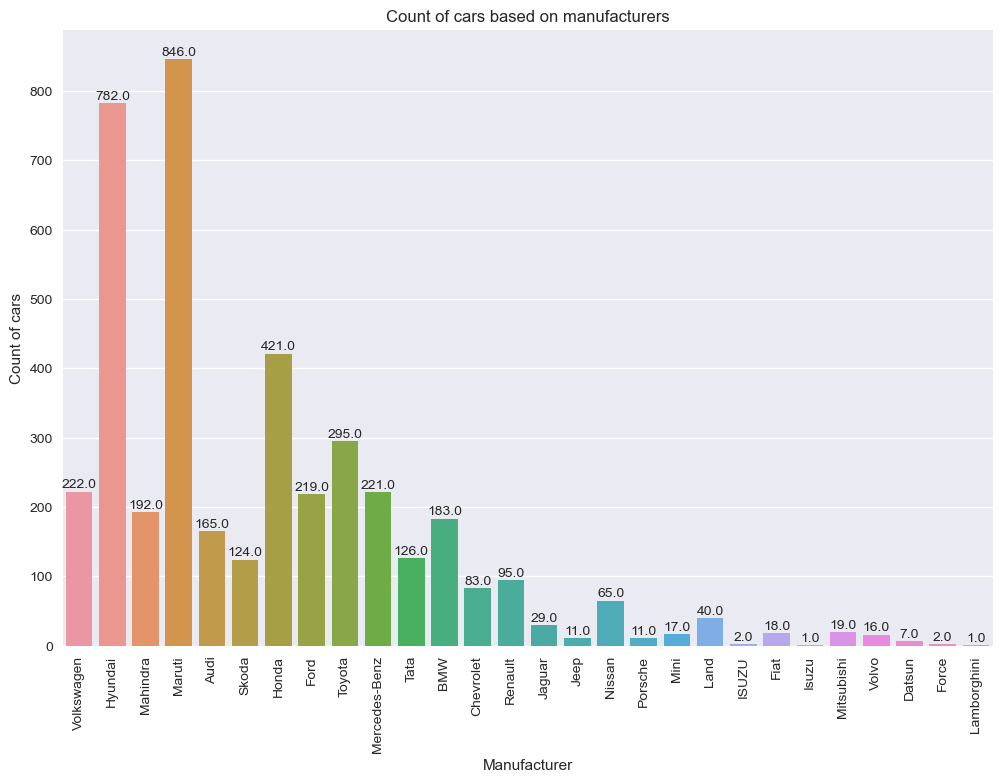

In [68]:
plt.figure(figsize = (12, 8))
plot = sns.countplot(x = 'Manufacturer', data = X_train)
plt.xticks(rotation = 90)
for p in plot.patches:
    plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')

plt.title("Count of cars based on manufacturers")
plt.xlabel("Manufacturer")
plt.ylabel("Count of cars")

In [69]:
df_main["Mileage"].fillna("No info",inplace = True)

In [70]:
df_main["Engine"].fillna("No info",inplace = True)

In [71]:
df_main["Seats"].fillna("No info",inplace = True)

In [72]:
df_main["Power"].fillna("No info",inplace = True)

In [73]:
df_main["New_Price"].fillna("No info",inplace = True)

In [74]:
df_main.isna().sum()

Unnamed: 0           0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
dtype: int64

In [75]:
df_main.columns

Index(['Unnamed: 0', 'Name', 'Location', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats', 'New_Price', 'Price'],
      dtype='object')

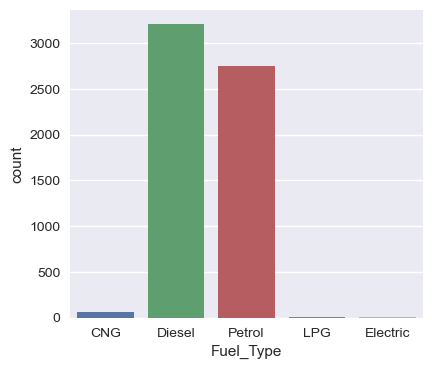

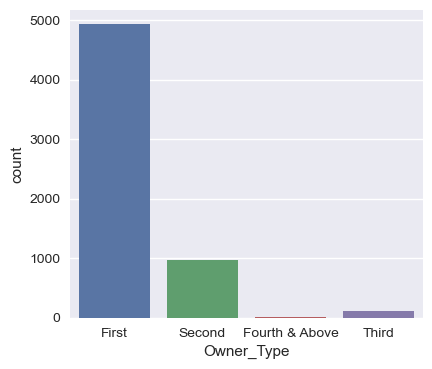

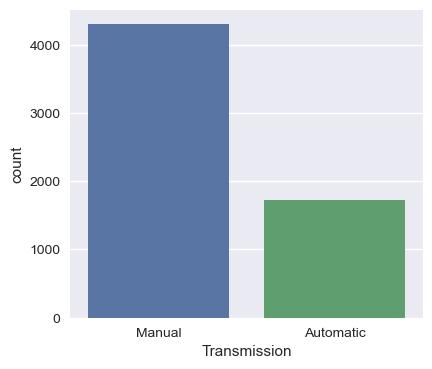

IndexError: list index out of range

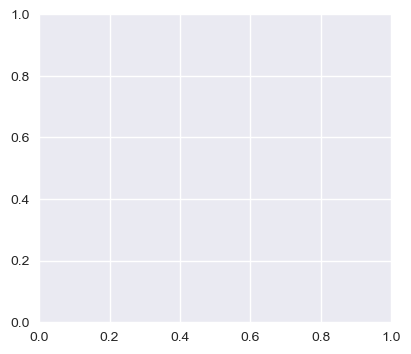

In [76]:
cat_cols = ['Fuel_Type','Owner_Type', 'Transmission']
i=0
while i < 4:
    fig = plt.figure(figsize=[10,4])
    plt.subplot(1,2,1)
    sns.countplot(x=cat_cols[i], data=df_main)
    i+= 1
    plt.show()

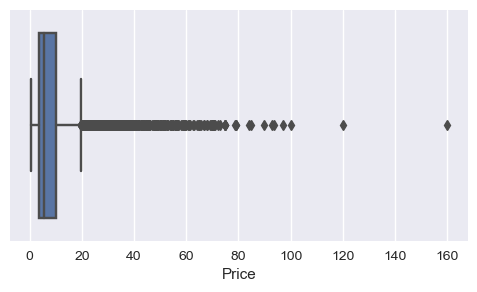

IndexError: list index out of range

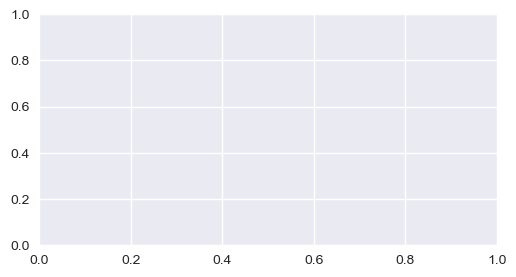

In [77]:
num_cols = ['Price']
i=0
while i < 4:
    fig = plt.figure(figsize=[13,3])
    #ax1 = fig.add_subplot(121)
    #ax2 = fig.add_subplot(122)
    
    #ax1.title.set_text(num_cols[i])
    plt.subplot(1,2,1)
    sns.boxplot(x=num_cols[i], data=df_main)
    i += 1
    
    plt.show()


In [78]:
df_main[df_main['Price'] > df_main['Price'].quantile(0.99)]

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
264,264,Mercedes-Benz GLE 350d,Coimbatore,2017,29819,Diesel,Automatic,First,11.57 kmpl,2987 CC,254.79 bhp,5.0,95.13 Lakh,61.29
282,282,Audi Q7 3.0 TDI Quattro Technology,Kochi,2018,11287,Diesel,Automatic,First,12.07 kmpl,2967 CC,241.4 bhp,7.0,No info,70.36
310,310,Mercedes-Benz GLE 250d,Hyderabad,2017,29000,Diesel,Automatic,First,17.9 kmpl,2143 CC,201.15 bhp,5.0,79.43 Lakh,57.00
327,327,Audi Q7 45 TDI Quattro Technology,Coimbatore,2017,97430,Diesel,Automatic,First,14.75 kmpl,2967 CC,245 bhp,7.0,1.04 Cr,62.67
392,392,Mercedes-Benz S Class 2005 2013 S 350 CDI,Coimbatore,2017,56451,Diesel,Automatic,First,13.5 kmpl,2987 CC,282 bhp,5.0,No info,62.81
418,418,Mercedes-Benz GLC 43 AMG Coupe,Coimbatore,2018,22397,Petrol,Automatic,First,11.5 kmpl,2996 CC,367 bhp,5.0,95.38 Lakh,70.99
655,655,Jaguar XJ 2.0L Portfolio,Mumbai,2017,10501,Petrol,Automatic,First,9.43 kmpl,1999 CC,237.4 bhp,5.0,No info,75.00
918,918,BMW X5 2014-2019 xDrive 30d Design Pure Experi...,Hyderabad,2016,76000,Diesel,Automatic,First,15.97 kmpl,2993 CC,258 bhp,7.0,No info,58.00
941,941,Land Rover Range Rover Evoque 2.0 TD4 HSE Dynamic,Kochi,2018,31427,Diesel,Automatic,First,15.68 kmpl,1999 CC,177 bhp,5.0,75.12 Lakh,59.72
1038,1038,Land Rover Range Rover TDV8 (Diesel),Bangalore,2011,55000,Diesel,Automatic,First,10.2 kmpl,4367 CC,308 bhp,7.0,No info,67.00


In [79]:
df_main[df_main['Kilometers_Driven'] > df_main['Kilometers_Driven'].quantile(0.99)]

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
29,29,Toyota Innova 2.5 V Diesel 7-seater,Mumbai,2007,262000,Diesel,Manual,Fourth & Above,12.8 kmpl,2494 CC,102 bhp,7.0,No info,4.00
64,64,Tata Indica V2 eLS,Chennai,2016,178000,Diesel,Manual,First,25.0 kmpl,1396 CC,69 bhp,5.0,No info,2.50
77,77,Toyota Innova 2.0 G1,Chennai,2006,230000,Petrol,Manual,Third,12.4 kmpl,1998 CC,132 bhp,8.0,No info,4.50
181,181,Ford Fiesta 1.4 TDCi EXI Limited Edition,Chennai,2006,216000,Diesel,Manual,Second,17.8 kmpl,1399 CC,68 bhp,5.0,No info,1.45
230,230,Tata Indica V2 DLS BSII,Jaipur,2007,200000,Diesel,Manual,Second,17.2 kmpl,1396 CC,53.5 bhp,5.0,No info,0.85
340,340,Skoda Octavia Ambition Plus 2.0 TDI AT,Kolkata,2013,775000,Diesel,Automatic,First,19.3 kmpl,1968 CC,141 bhp,5.0,No info,7.50
358,358,Hyundai i10 Magna 1.2,Chennai,2009,620000,Petrol,Manual,First,20.36 kmpl,1197 CC,78.9 bhp,5.0,No info,2.70
482,482,Ford Endeavour Hurricane Limited Edition,Hyderabad,2008,179000,Diesel,Automatic,Second,12.8 kmpl,2953 CC,156 bhp,7.0,No info,4.24
556,556,Toyota Etios Liva GD,Chennai,2013,179000,Diesel,Manual,First,23.59 kmpl,1364 CC,67.04 bhp,5.0,No info,3.80
576,576,Audi A6 2011-2015 2.0 TDI Premium Plus,Hyderabad,2012,202082,Diesel,Automatic,First,17.68 kmpl,1968 CC,174.33 bhp,5.0,No info,12.30


In [80]:
df_main.corr()["Price"]

ValueError: could not convert string to float: 'Maruti Wagon R LXI CNG'

In [81]:
df_main.pivot_table(values="Price", index = "Owner_Type", columns = "Fuel_Type" )

Fuel_Type,CNG,Diesel,Electric,LPG,Petrol
Owner_Type,,,,,
First,3.747556,13.280045,12.875,2.54625,6.094560
Fourth & Above,NaN,3.290000,NaN,NaN,3.267500
Second,2.710000,11.148727,NaN,2.25000,4.041919
Third,1.200000,5.826512,NaN,NaN,4.551884


In [82]:
df_main.pivot_table(values = "Price", index = "Owner_Type", columns = "Transmission")

Transmission,Automatic,Manual
Owner_Type,,
First,20.696984,5.665580
Fourth & Above,5.500000,3.002500
Second,16.267053,3.983280
Third,13.118800,2.702841


In [83]:
df_main.drop(labels ="Name", axis= 1, inplace = True)

In [84]:
df_main.head()

,Unnamed: 0,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,No info,1.75
1,1,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,No info,12.50
2,2,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,No info,6.00
4,4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,No info,17.74


In [85]:
df_main = pd.get_dummies(data = df_main, drop_first=True)

In [86]:
df_main.head()

Unnamed: 0  Year  Kilometers_Driven  Price  Location_Bangalore  \
0           0  2010              72000   1.75               False   
1           1  2015              41000  12.50               False   
2           2  2011              46000   4.50               False   
3           3  2012              87000   6.00               False   
4           4  2013              40670  17.74               False   

   Location_Chennai  Location_Coimbatore  Location_Delhi  Location_Hyderabad  \
0             False                False           False               False   
1             False                False           False               False   
2              True                False           False               False   
3              True                False           False               False   
4             False                 True           False               False   

   Location_Jaipur  Location_Kochi  Location_Kolkata  Location_Mumbai  \
0            False           False             False             True   
1            False           False             False            False   
2            False           False             False            False   
3            False           False             False            False   
4            False           False             False            False   

   Location_Pune  Fuel_Type_Diesel  Fuel_Type_Electric  Fuel_Type_LPG  \
0          False             False               False          False   
1           True              True               False          False   
2          False             False               False          False   
3          False              True               False          False   
4          False              True               False          False   

   Fuel_Type_Petrol  Transmission_Manual  Owner_Type_Fourth & Above  \
0             False                 True                      False   
1             False                 True                      False   
2              True                 True                      False   
3             False                 True                      False   
4             False                False                      False   

   Owner_Type_Second  Owner_Type_Third  Mileage_10.0 kmpl  Mileage_10.1 kmpl  \
0              False             False              False              False   
1              False             False              False              False   
2              False             False              False              False   
3              False             False              False              False   
4               True             False              False              False   

   Mileage_10.13 kmpl  Mileage_10.2 kmpl  Mileage_10.37 kmpl  \
0               False              False               False   
1               False              False               False   
2               False              False               False   
3               False              False               False   
4               False              False               False   

   Mileage_10.4 kmpl  Mileage_10.5 kmpl  Mileage_10.6 kmpl  Mileage_10.8 kmpl  \
0              False              False              False              False   
1              False              False              False              False   
2              False              False              False              False   
3              False              False              False              False   
4              False              False              False              False   

   Mileage_10.9 kmpl  Mileage_10.91 kmpl  Mileage_10.93 kmpl  \
0              False               False               False   
1              False               False               False   
2              False               False               False   
3              False               False               False   
4              False               False               False   

   Mileage_10.98 kmpl  Mileage_11.0 kmpl  Mileage_11.05 kmpl  \


In [87]:
### Train-Test Split

In [88]:
y = df_main["Price"]
X = df_main.drop("Price", axis=1)

In [89]:
#from sklearn.model_selection import train_test_split

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print("x train: ", X_train.shape)
print("x test: ", X_test.shape)
print("y train: ", y_train.shape)
print("y test: ", y_test.shape)

x train:  (4815, 1530)
x test:  (1204, 1530)
y train:  (4815,)
y test:  (1204,)


In [92]:
##Applying Regression Models

In [93]:
#Linear Regression

In [94]:
#from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [95]:
CV =[]
R2_train= []
R2_test = []

def car_pred_model(model,model_name):
    model.fit(X_train, y_train)
    
    y_pred_train = model.predict(X_train)
    R2_train_model = r2_score(y_train,y_pred_train)
    R2_train.append(round(R2_train_model,2))
    
    y_pred_test = model.predict(X_test)
    R2_test_model = r2_score(y_test, y_pred_test)
    R2_test.append(round(R2_test_model,2))
    
    cross_val = cross_val_score(model, X_train, y_train, cv=5)
    cv_mean = cross_val.mean()
    CV.append(round(cv_mean,2))
    
    print("Train R2-score :", round(R2_train_model,2))
    print("Test R2-score :", round(R2_test_model,2))
    print("Train CV scores :", cross_val)
    print("Train CV mean :",round(cv_mean,2))
    
    fig, ax = plt.subplots(1,2, figsize = (10,4))
    ax[0].set_title("Residual Plot of Train samples")
    sns.distplot((y_train-y_pred_train),hist = False,ax = ax[0])
    ax[0].set_xlabel("y_train - y_pred_test")
    
    ax[1].set_title('y_test vs y_pred_test')
    ax[1].scatter(x = y_test, y = y_pred_test)
    ax[1].set_xlabel("y_test")
    ax[1].set_ylabel("y_pred_test")
    
    plt.show()

Train R2-score : 0.96
Test R2-score : -501950475.88
Train CV scores : [-8.41747877e+09  6.90060987e-01 -1.10727457e+11  6.52439491e-01
 -9.32640663e+10]
Train CV mean : -42481800476.35


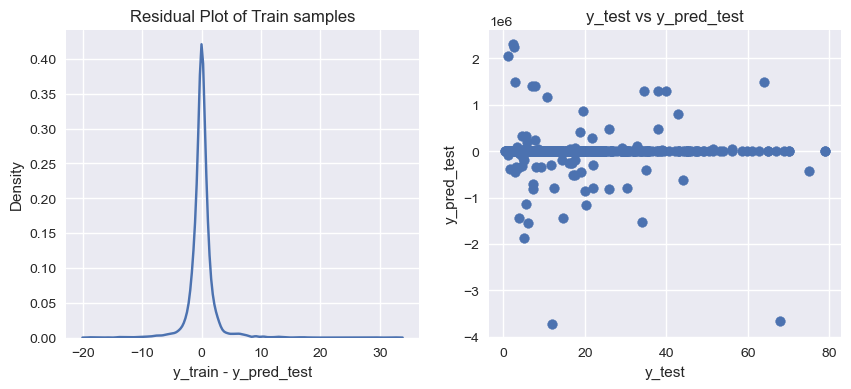

In [96]:
#from sklearn.linear_model import LinearRegression

lr = LinearRegression()
car_pred_model(lr,"Linear_regressor.pkl")

In [97]:
#from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor()

# Number of trees in Random forest
n_estimators=[6]
# Maximum number of levels in a tree
max_depth=[6]
# Minimum number of samples required to split an internal node
min_samples_split=[2,5]
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2]
# Number of fearures to be considered at each split
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

rf_rs = RandomizedSearchCV(estimator = rf, param_distributions = param_grid)

Train R2-score : 0.78
Test R2-score : 0.78
Train CV scores : [0.64395452 0.71160293 0.69496068 0.65457243 0.68731601]
Train CV mean : 0.68


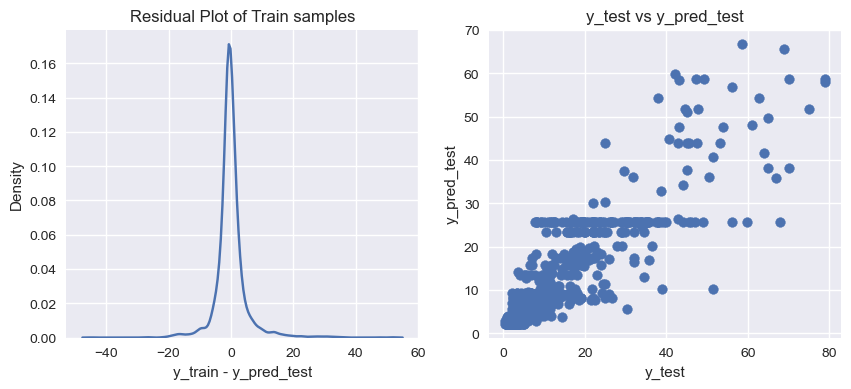

In [98]:
car_pred_model(rf_rs,'random_forest.pkl')

In [41]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

gb = GradientBoostingRegressor()

# Rate at which correcting is being made
learning_rate = [0.001, 0.01, 0.1, 0.2]
# Number of trees in Gradient boosting
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,9,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"learning_rate":learning_rate,
              "n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

gb_rs = RandomizedSearchCV(estimator = gb, param_distributions = param_grid)

In [42]:
car_pred_model(gb_rs,"gradient_boosting.pkl")

KeyboardInterrupt: 

In [40]:
Technique = ["LinearRegression","RandomForestRegressor"]
results=pd.DataFrame({'Model': Technique,'R Squared(Train)': R2_train,'R Squared(Test)': R2_test,'CV score mean(Train)': CV})
display(results)

,Model,R Squared(Train),R Squared(Test),CV score mean(Train)
0,LinearRegression,0.96,-1.943868e+10,-7.510559e+10
1,RandomForestRegressor,0.77,7.600000e-01,6.900000e-01
